In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from itertools import compress
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [216]:
features = ['TEAM', 'CONF', 'G', 'YEAR', 'ADJOE','ADJDE', 'BARTHAG', 'EFG_O', 'EFO_D', 'TOR', 
            'TORD', 'ORB', 'DRB', 'FTR', 'FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB','POSTSEASON','SEED','W']

file_path = '/Users/mattrusso/Desktop/cbb.csv'
df = pd.read_csv(file_path)

X = df.iloc[:,0:17].to_numpy() #input features
y = df.iloc[:,17].tolist() #labels

In [217]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016


In [218]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [219]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000,1757.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,...,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176,2017.002277
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,...,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090,1.415419
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,...,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000,2015.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,...,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000,2016.000000
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,...,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000,2017.000000
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,...,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,...,51.000000,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [220]:
le = preprocessing.LabelEncoder()
le.fit(df['W'])
df['W'] = le.transform(df['W'])

In [221]:
le

LabelEncoder()

Deleting these 6 columns just to run feature selection. I wanted to keep only numerical data. The team name is gone but you can still see what team it is by the ID #. I kept another source of code where it would be easier to keep the team name. 

In [222]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016


In [223]:
X = df.loc[:,['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]

In [224]:
X.shape

(1757, 17)

In [225]:
y = df.W

In [226]:
y.shape

(1757,)

In [227]:
scaler = MinMaxScaler(feature_range=(0.1,0.9) 
                     )

X = scaler.fit_transform(X)

In [228]:
k_best   = SelectKBest(score_func= f_regression, 
                     k=7 
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)

In [229]:
support = k_best.get_support()

In [230]:
feature = ['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']

In [231]:
print(list(compress(feature, support))) 

['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', '2P_O', 'WAB']


In [232]:
DFB = df[['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', '2P_O', 'WAB']]

In [233]:
DFX = df['W']

In [234]:
DFB

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,2P_O,WAB
0,123.3,94.9,0.9531,52.6,48.1,53.9,8.6
1,129.1,93.6,0.9758,54.8,47.7,54.8,11.3
2,114.4,90.4,0.9375,53.9,47.7,54.7,6.9
3,115.2,85.2,0.9696,53.5,43.0,52.8,7.0
4,117.8,86.3,0.9728,56.6,41.1,56.3,7.7
...,...,...,...,...,...,...,...
1752,111.2,94.7,0.8640,51.4,46.9,52.5,1.9
1753,117.9,96.6,0.9081,51.2,49.9,52.9,7.3
1754,122.8,95.2,0.9488,55.3,48.1,55.4,9.9
1755,117.4,94.5,0.9238,55.2,44.8,54.3,2.1


In [235]:
X_train, X_test, y_train, y_test = train_test_split(DFB, DFX, test_size=0.20, random_state=5)
regressor= SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=1, C=6.0, epsilon=2.0, shrinking=True, cache_size=50, verbose=False, max_iter=-1)
regressor.fit(X_train,y_train)

SVR(C=6.0, cache_size=50, coef0=0.0, degree=3, epsilon=2.0, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=1, verbose=False)

In [236]:
print('accuracy:',regressor.score(X_train,y_train))

accuracy: 0.8715868264713903


In [237]:
y_pred = regressor.predict(X_test)

In [238]:
y_pred

array([13.86966475, 18.30411834, 11.7245923 , 12.40065649, 14.06504704,
       17.26831489, 11.59923058, 18.75152329,  6.86692844, 13.83965118,
       17.12127594, 15.7881879 , 14.90042909, 17.27515015, 21.03957605,
       12.12841173, 19.7383471 , 15.17392189, 20.58620057, 29.83369798,
       19.98692162, 23.50822081, 15.0317909 , 19.40068238, 10.39985167,
       17.98084333,  6.19160696, 22.60875989, 12.38515922, 18.70831624,
       28.2456232 , 17.38104819, 25.06755442, 12.15545943, 13.6267726 ,
        8.17192347, 22.6445426 ,  5.74693368, 16.63205308, 20.95925496,
       26.90504629, 23.12631187, 10.24819115, 19.62210945, 19.2292342 ,
        6.80770733, 19.81836263, 20.90346594, 14.6468492 , 19.74631407,
       10.00807962, 23.31239159, 12.3969302 , 12.98436285, 24.07785449,
        9.80180185, 12.13899366, 22.31638737, 16.51610541, 18.94347813,
       31.2800268 , 25.33372451, 34.08860415, 15.47529083,  4.52221447,
       21.48012514, 20.61195211,  5.44656942, 26.38256882, 19.67

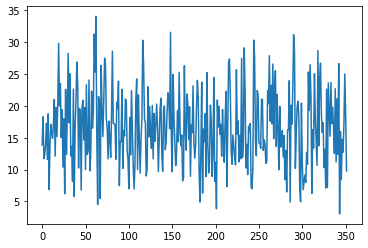

In [239]:
plt.plot(y_pred)
plt.show()

In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.9599913425070368


In [247]:
dfm= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff': abs(y_test-y_pred)})
dfm.sort_values(by=['Diff'], inplace=True, ascending=True)
dfm[:20]

,Actual,Predicted,Diff
961,10,10.008080,0.008080
1113,13,13.008679,0.008679
1195,14,13.974734,0.025266
834,24,24.028080,0.028080
1401,3,3.040148,0.040148
1388,21,20.959255,0.040745
1363,11,10.956884,0.043116
1373,13,13.044591,0.044591
966,19,18.943478,0.056522
108,21,20.924415,0.075585


In [248]:
dfl = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff': abs(y_test-y_pred)})
dfl.sort_values(by=['Diff'], inplace=True, ascending=False)
dfl[:20]

,Actual,Predicted,Diff
534,25,16.574411,8.425589
688,23,15.972768,7.027232
746,21,14.743463,6.256537
123,8,13.977908,5.977908
1575,23,28.693279,5.693279
292,10,15.582234,5.582234
1681,28,22.425428,5.574572
634,9,14.411552,5.411552
1612,23,17.623494,5.376506
1198,8,13.338034,5.338034
